# NN5: Testowanie różnych funkcji aktywacji
Adrianna Grudzień

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import copy

from py_files.activation_functions import Sigmoid, Linear, Softmax, Tanh, ReLU
from py_files.metrics import mse, f_score, cross_entropy
from py_files.prepare_data import read_classification_data, read_regression_data, read_classification_data2
from py_files.network import NN

ImportError: cannot import name 'read_classification_data2' from 'py_files.prepare_data' (/home/ada/Desktop/studia/mini/sem VI/metody inteligencji obliczeniowej/MIOwAD/sieci MLP/notebooks/py_files/prepare_data.py)

In [2]:
def plot_results(x, y_true, y_preds):
    plt.figure(figsize=[16, 4])
    plt.subplot(141)
    plt.scatter(x, y_true)
    plt.title('Oryginalne dane')
    plt.subplot(142)
    plt.scatter(x, y_preds[0])
    plt.title('Architektura 1')
    plt.subplot(143)
    plt.scatter(x, y_preds[1])
    plt.title('Architektura 2')
    plt.subplot(144)
    plt.scatter(x, y_preds[2])
    plt.title('Architektura 3')
    plt.show()

# Zbiór `multimodal-large`

In [3]:
m_x_train, m_y_train = read_regression_data('../data/regression/multimodal-large-training.csv', index_col=None)
m_x_test, m_y_test = read_regression_data('../data/regression/multimodal-large-test.csv', index_col=None)

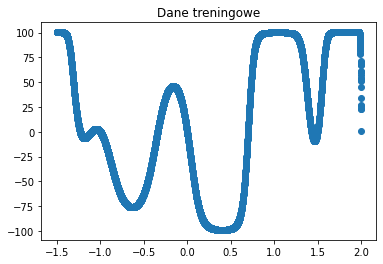

In [4]:
plt.scatter(m_x_train, m_y_train)
plt.title('Dane treningowe')
plt.show()

In [5]:
arch1 = [32, 1]
arch2 = [40, 40, 1]
arch3 = [32, 32, 16, 1]
results_df = pd.DataFrame(columns=['MSE - 1 layer', 'MSE - 2 layers', 'MSE - 3 layers'])

## Funkcja sigmoid

In [47]:
nn_sig_a1 = NN(input_shape=m_x_train.shape, neurons_num=arch1, activations=[Sigmoid(), Linear()])
nn_sig_a1.fit(m_x_train, m_y_train, batch_size=64, n_epochs=200, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [53]:
nn_sig_a2 = NN(input_shape=m_x_train.shape, neurons_num=arch2, activations=[Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=200, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [54]:
nn_sig_a3 = NN(input_shape=m_x_train.shape, neurons_num=arch3, activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=200, learning_rate=0.0003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


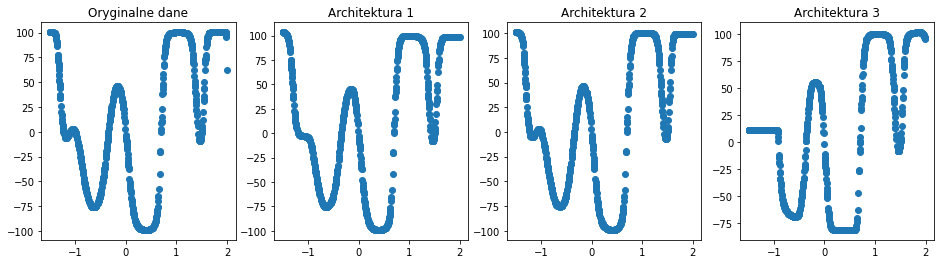

In [55]:
results_sigmoid = [
    nn_sig_a1.predict(m_x_test),
    nn_sig_a2.predict(m_x_test),
    nn_sig_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_sigmoid)

In [56]:
results_df.loc['Sigmoid'] = [mse(m_y_test, y_pred) for y_pred in results_sigmoid]

## Funkcja liniowa


In [11]:
nn_lin_a1 = NN(input_shape=m_x_train.shape, neurons_num=arch1, activations=[Linear(), Linear()])
nn_lin_a1.fit(m_x_train, m_y_train, batch_size=64, n_epochs=300, learning_rate=0.000003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


Epoch number 300/300
Loss on training set: 4398.281449922342 mse on training set: 4398.281449922342, loss on test set: 4433.789882673688 mse on test set: 4433.789882673688


In [12]:
nn_lin_a2 = NN(input_shape=m_x_train.shape, neurons_num=arch2, activations=[Linear(), Linear(), Linear()])
nn_lin_a2.fit(m_x_train, m_y_train, batch_size=64, n_epochs=300, learning_rate=0.000003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


Epoch number 300/300
Loss on training set: 4403.229870293341 mse on training set: 4403.229870293341, loss on test set: 4437.943508019143 mse on test set: 4437.943508019143


In [13]:
nn_lin_a3 = NN(input_shape=m_x_train.shape, neurons_num=arch3, activations=[Linear(), Linear(), Linear(), Linear()])
nn_lin_a3.fit(m_x_train, m_y_train, batch_size=64, n_epochs=300, learning_rate=0.000003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


Epoch number 300/300
Loss on training set: 4407.185608067341 mse on training set: 4407.185608067341, loss on test set: 4442.128375265337 mse on test set: 4442.128375265337


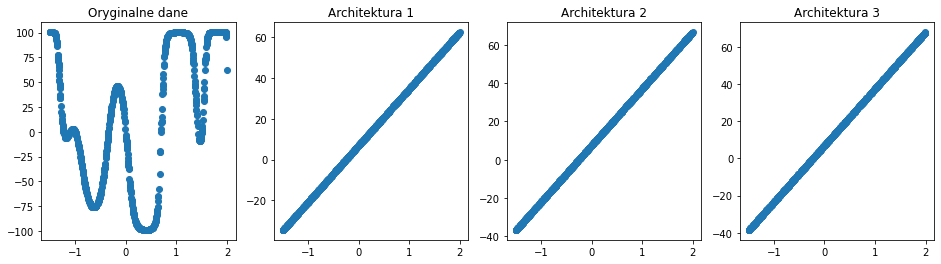

In [14]:
results_linear = [
    nn_lin_a1.predict(m_x_test),
    nn_lin_a2.predict(m_x_test),
    nn_lin_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_linear)

In [15]:
results_df.loc['Linear'] = [mse(m_y_test, y_pred) for y_pred in results_linear]

## Funkcja tanh

In [42]:
nn_tan_a1 = NN(input_shape=m_x_train.shape, neurons_num=arch1, activations=[Tanh(), Linear()])
nn_tan_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=100, learning_rate=0.00003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [40]:
nn_tan_a2 = NN(input_shape=m_x_train.shape, neurons_num=arch2, activations=[Tanh(), Tanh(), Linear()])
nn_tan_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=100, learning_rate=0.0001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [41]:
nn_tan_a3 = NN(input_shape=m_x_train.shape, neurons_num=arch3, activations=[Tanh(), Tanh(), Tanh(), Linear()])
nn_tan_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=160, learning_rate=0.00003, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


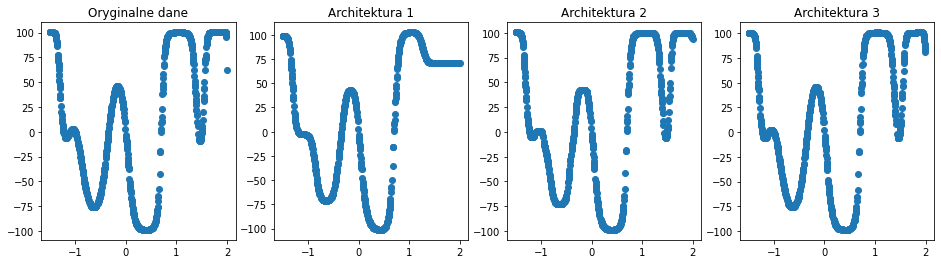

In [43]:
results_tanh = [
    nn_tan_a1.predict(m_x_test),
    nn_tan_a2.predict(m_x_test),
    nn_tan_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_tanh)

In [44]:
results_df.loc['Tanh'] = [mse(m_y_test, y_pred) for y_pred in results_tanh]

## Funkcja ReLU

In [28]:
nn_rel_a1 = NN(input_shape=m_x_train.shape, neurons_num=arch1, activations=[ReLU(), Linear()])
nn_rel_a1.fit(m_x_train, m_y_train, batch_size=64, n_epochs=150, learning_rate=0.00001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [29]:
nn_rel_a2 = NN(input_shape=m_x_train.shape, neurons_num=arch2, activations=[ReLU(), ReLU(), Linear()])
nn_rel_a2.fit(m_x_train, m_y_train, batch_size=64, n_epochs=50, learning_rate=0.00005, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


In [30]:
nn_rel_a3 = NN(input_shape=m_x_train.shape, neurons_num=arch3, activations=[ReLU(), ReLU(), ReLU(), Linear()])
nn_rel_a3.fit(m_x_train, m_y_train, batch_size=64, n_epochs=90, learning_rate=0.00001, loss=mse, metric=mse, x_test=m_x_test, y_test=m_y_test, verbose_step=300)


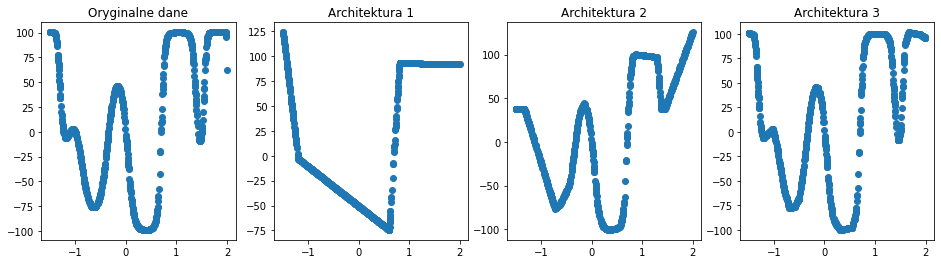

In [31]:
results_relu = [
    nn_rel_a1.predict(m_x_test),
    nn_rel_a2.predict(m_x_test),
    nn_rel_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_relu)

In [32]:
results_df.loc['ReLU'] = [mse(m_y_test, y_pred) for y_pred in results_relu]

# Wybór najlepszych parametrów
- funkcji aktywacji
- architektury

In [57]:
results_df

,MSE - 1 layer,MSE - 2 layers,MSE - 3 layers
Sigmoid,4.110139,1.824580,495.202067
Linear,4433.789883,4437.943508,4442.128375
Tanh,329.240084,6.515091,2.590387
ReLU,1431.778197,355.191391,7.694468


In [147]:
results_df.rename(columns = {'MSE - 1 layer':'MSE - arch1', 'MSE - 2 layers':'MSE - arch2', 'MSE - 3 layers':'MSE - arch3'})

,MSE - arch1,MSE - arch2,MSE - arch3
Sigmoid,4.110139,1.824580,495.202067
Linear,4433.789883,4437.943508,4442.128375
Tanh,329.240084,6.515091,2.590387
ReLU,1431.778197,355.191391,7.694468


Dla wykorzystanych parametrów najlepsze okazały się zestawy:
- funkcja `sigmoid`, architektura `nr 2`
- funkcja `Tanh`, architektura `nr 3`

# Zbiór `steps-large` (regresja)

In [27]:
sl_x_train, sl_y_train = read_regression_data('../data/regression/steps-large-training.csv', index_col=None)
sl_x_test, sl_y_test = read_regression_data('../data/regression/steps-large-test.csv', index_col=None)

In [59]:
sl_sig_a2 = NN(input_shape=sl_x_train.shape, neurons_num=arch2, activations=[Sigmoid(), Sigmoid(), Linear()], seed=123)
sl_sig_a2.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=200, learning_rate=0.0003, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=300)


In [60]:
sl_tan_a3 = NN(input_shape=sl_x_train.shape, neurons_num=arch3, activations=[Tanh(), Tanh(), Tanh(), Linear()])
sl_tan_a3.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=160, learning_rate=0.00003, loss=mse, metric=mse, x_test=sl_x_test, y_test=sl_y_test, verbose_step=300)


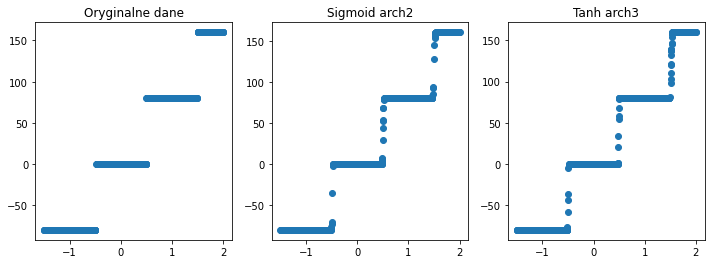

In [61]:
sl_preds = [sl_sig_a2.predict(sl_x_test), sl_tan_a3.predict(sl_x_test)]
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(sl_x_test, sl_y_test)
plt.title('Oryginalne dane')
plt.subplot(132)
plt.scatter(sl_x_test, sl_preds[0])
plt.title('Sigmoid arch2')
plt.subplot(133)
plt.scatter(sl_x_test, sl_preds[1])
plt.title('Tanh arch3')
plt.show()

## Zbiór `rings5-regular` (klasyfikacja)

- zmieniam ostatnią warstwę architektur na 5-neuronową

In [129]:
arch2_class = arch2.copy()
arch2_class[-1] = 5

arch3_class = arch3.copy()
arch3_class[-1] = 5

In [113]:
r5_x_train, r5_y_train = read_classification_data('../data/classification/rings5-regular-training.csv')
r5_x_test, r5_y_test = read_classification_data('../data/classification/rings5-regular-test.csv')

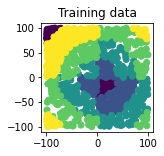

In [118]:
plt.figure(figsize=[2, 2])
plt.scatter(r5_x_train[:, 0], r5_x_train[:, 1], c=np.argmax(r5_y_train, axis=1))
plt.title('Training data')
plt.show()

In [134]:
r5_sig_a2 = NN(input_shape=r5_x_train.shape, neurons_num=arch2_class, activations=[Sigmoid(), Sigmoid(), Softmax()], seed=123)
r5_sig_a2.fit(r5_x_train, r5_y_train, batch_size=4, n_epochs=200, learning_rate=0.0003, loss=cross_entropy, metric=f_score, x_test=r5_x_test, y_test=r5_y_test, verbose_step=300)


In [135]:
r5_tan_a2 = NN(input_shape=r5_x_train.shape, neurons_num=arch3_class, activations=[Tanh(), Tanh(), Tanh(), Softmax()], seed=123)
r5_tan_a2.fit(r5_x_train, r5_y_train, batch_size=4, n_epochs=160, learning_rate=0.0003, loss=cross_entropy, metric=f_score, x_test=r5_x_test, y_test=r5_y_test, verbose_step=300)


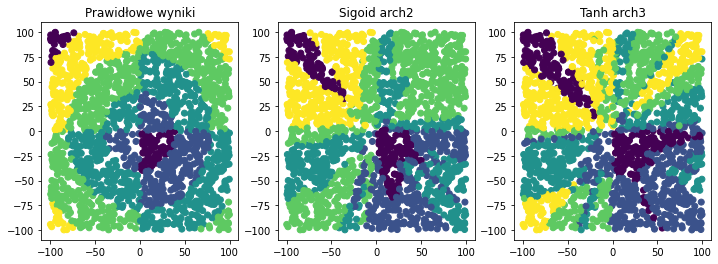

In [137]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(r5_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(r5_sig_a2.predict(r5_x_test), axis=1))
plt.title('Sigoid arch2')
plt.subplot(133)
plt.title('Tanh arch3')
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(r5_tan_a2.predict(r5_x_test), axis=1))
plt.show()

## Zbiór `rings3-regular` (klasyfikacja)

In [138]:
r3_x_train, r3_y_train = read_classification_data('../data/classification/rings3-regular-training.csv')
r3_x_test, r3_y_test = read_classification_data('../data/classification/rings3-regular-test.csv')

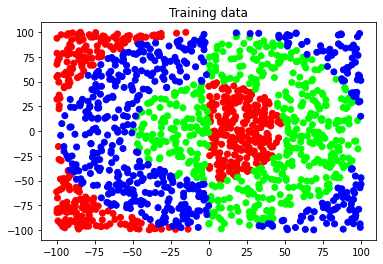

In [139]:
plt.scatter(r3_x_train[:, 0], r3_x_train[:, 1], c=r3_y_train)
plt.title('Training data')
plt.show()

In [140]:
arch2_class = arch2.copy()
arch2_class[-1] = 3

arch3_class = arch3.copy()
arch3_class[-1] = 3

In [141]:
r3_sig_a2 = NN(input_shape=r3_x_train.shape, neurons_num=arch2_class, activations=[Sigmoid(), Sigmoid(), Softmax()], seed=123)
r3_sig_a2.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=200, learning_rate=0.0003, loss=cross_entropy, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=300)


In [142]:
r3_tan_a2 = NN(input_shape=r3_x_train.shape, neurons_num=arch3_class, activations=[Tanh(), Tanh(), Tanh(), Softmax()], seed=123)
r3_tan_a2.fit(r3_x_train, r3_y_train, batch_size=4, n_epochs=160, learning_rate=0.0003, loss=cross_entropy, metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=300)


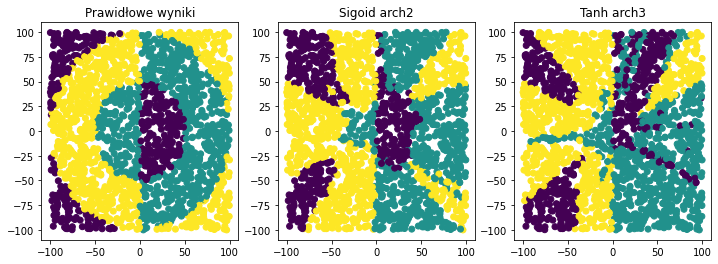

In [143]:
plt.figure(figsize=[12, 4])
plt.subplot(131)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_y_test, axis=1))
plt.title('Prawidłowe wyniki')
plt.subplot(132)
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_sig_a2.predict(r3_x_test), axis=1))
plt.title('Sigoid arch2')
plt.subplot(133)
plt.title('Tanh arch3')
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_tan_a2.predict(r3_x_test), axis=1))
plt.show()